In [25]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:

data = pd.read_csv("heart.csv")


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [28]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [29]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Percentage of females with heart disease: 72.43589743589743
Percentage of males with heart disease: 42.07573632538569


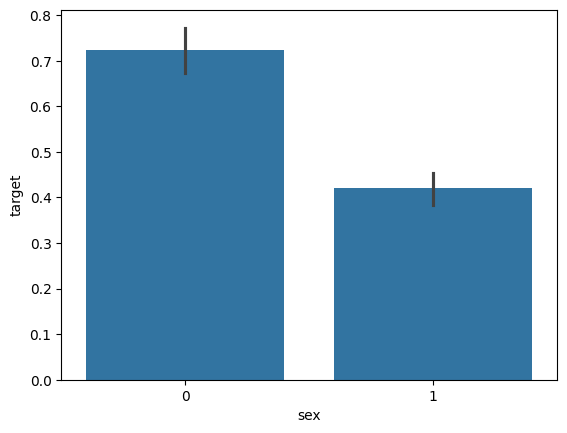

In [30]:
sns.barplot(data=data, x='sex', y='target')

print("Percentage of females with heart disease:",
      data[data['sex'] == 0]['target'].mean() * 100)

print("Percentage of males with heart disease:",
      data[data['sex'] == 1]['target'].mean() * 100)

Female (0) is having more heart diseases compared to male (1)

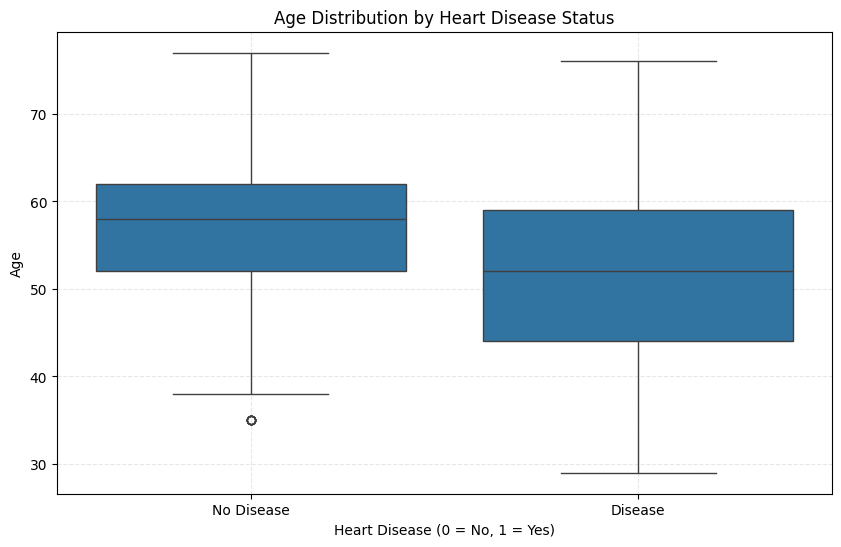

In [31]:
# Boxplot of Age by Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=data)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

C:\Users\22ai-\AppData\Local\Temp\ipykernel_25444\1772679565.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_rate = data.groupby('age_group')['target'].mean().reset_index()


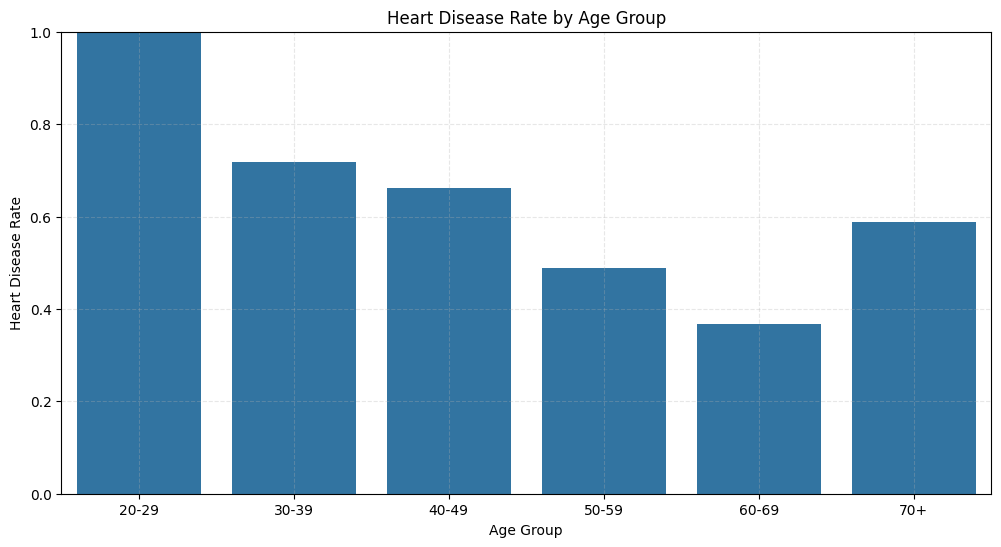

In [32]:
# Create age groups
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Calculate heart disease rate by age group
age_group_rate = data.groupby('age_group')['target'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='target', data=age_group_rate)
plt.title('Heart Disease Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease Rate')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Heart disease rate is higher in 20-29 age group

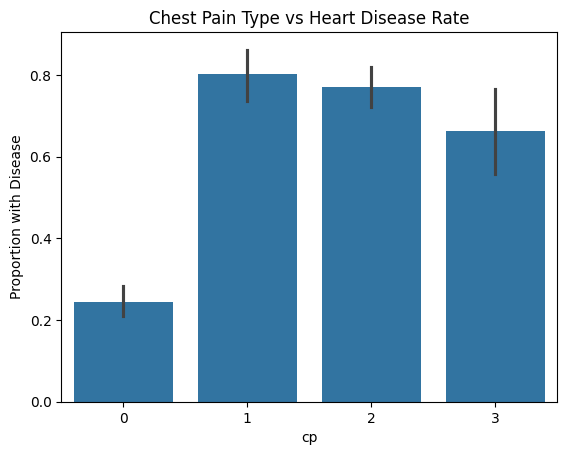

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=data, x='cp', y='target')
plt.title("Chest Pain Type vs Heart Disease Rate")
plt.ylabel("Proportion with Disease")
plt.show()


Type 0 chest pain is less likely to be a Heart diseases compared to other 3

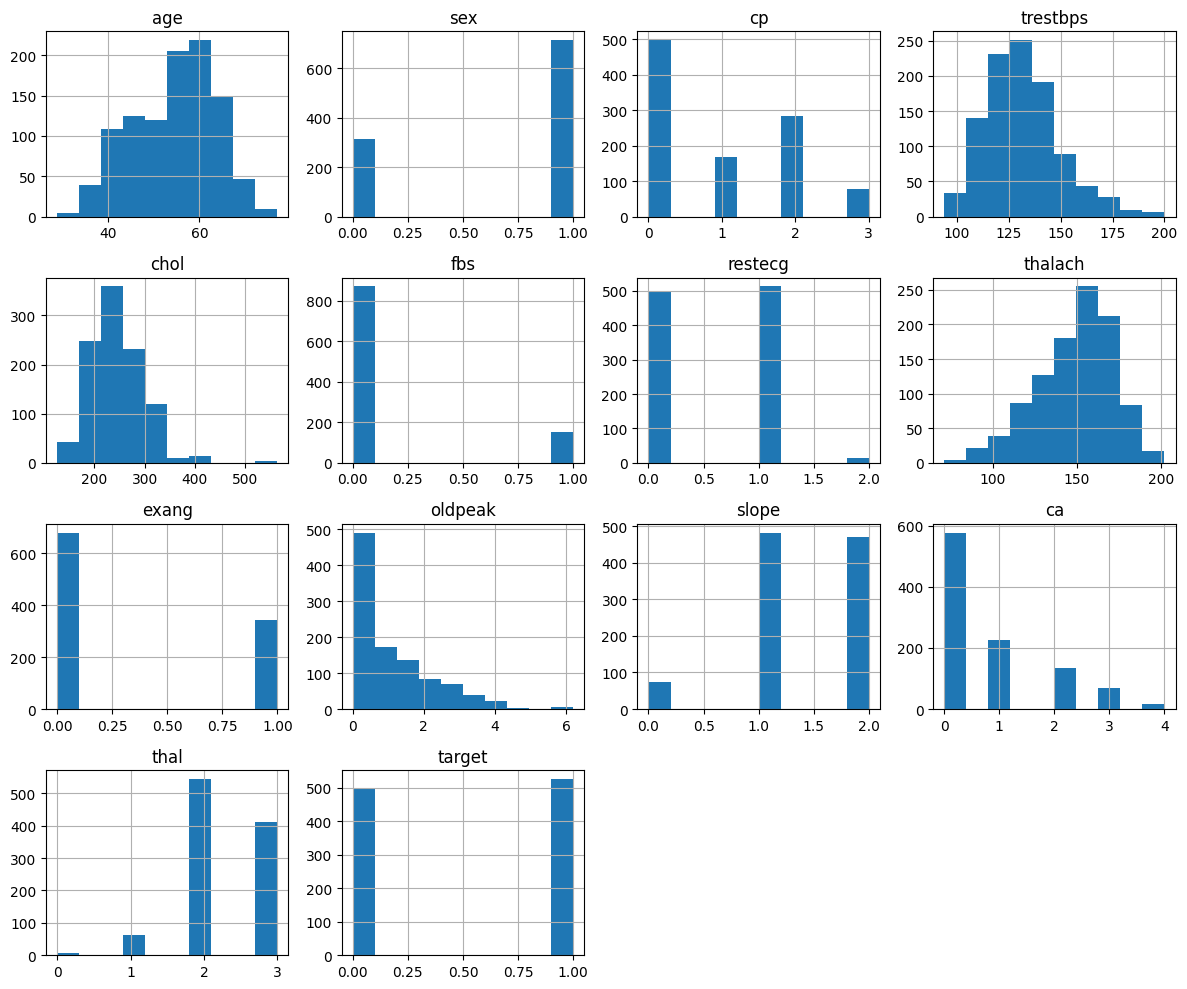

In [34]:
import matplotlib.pyplot as plt

data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


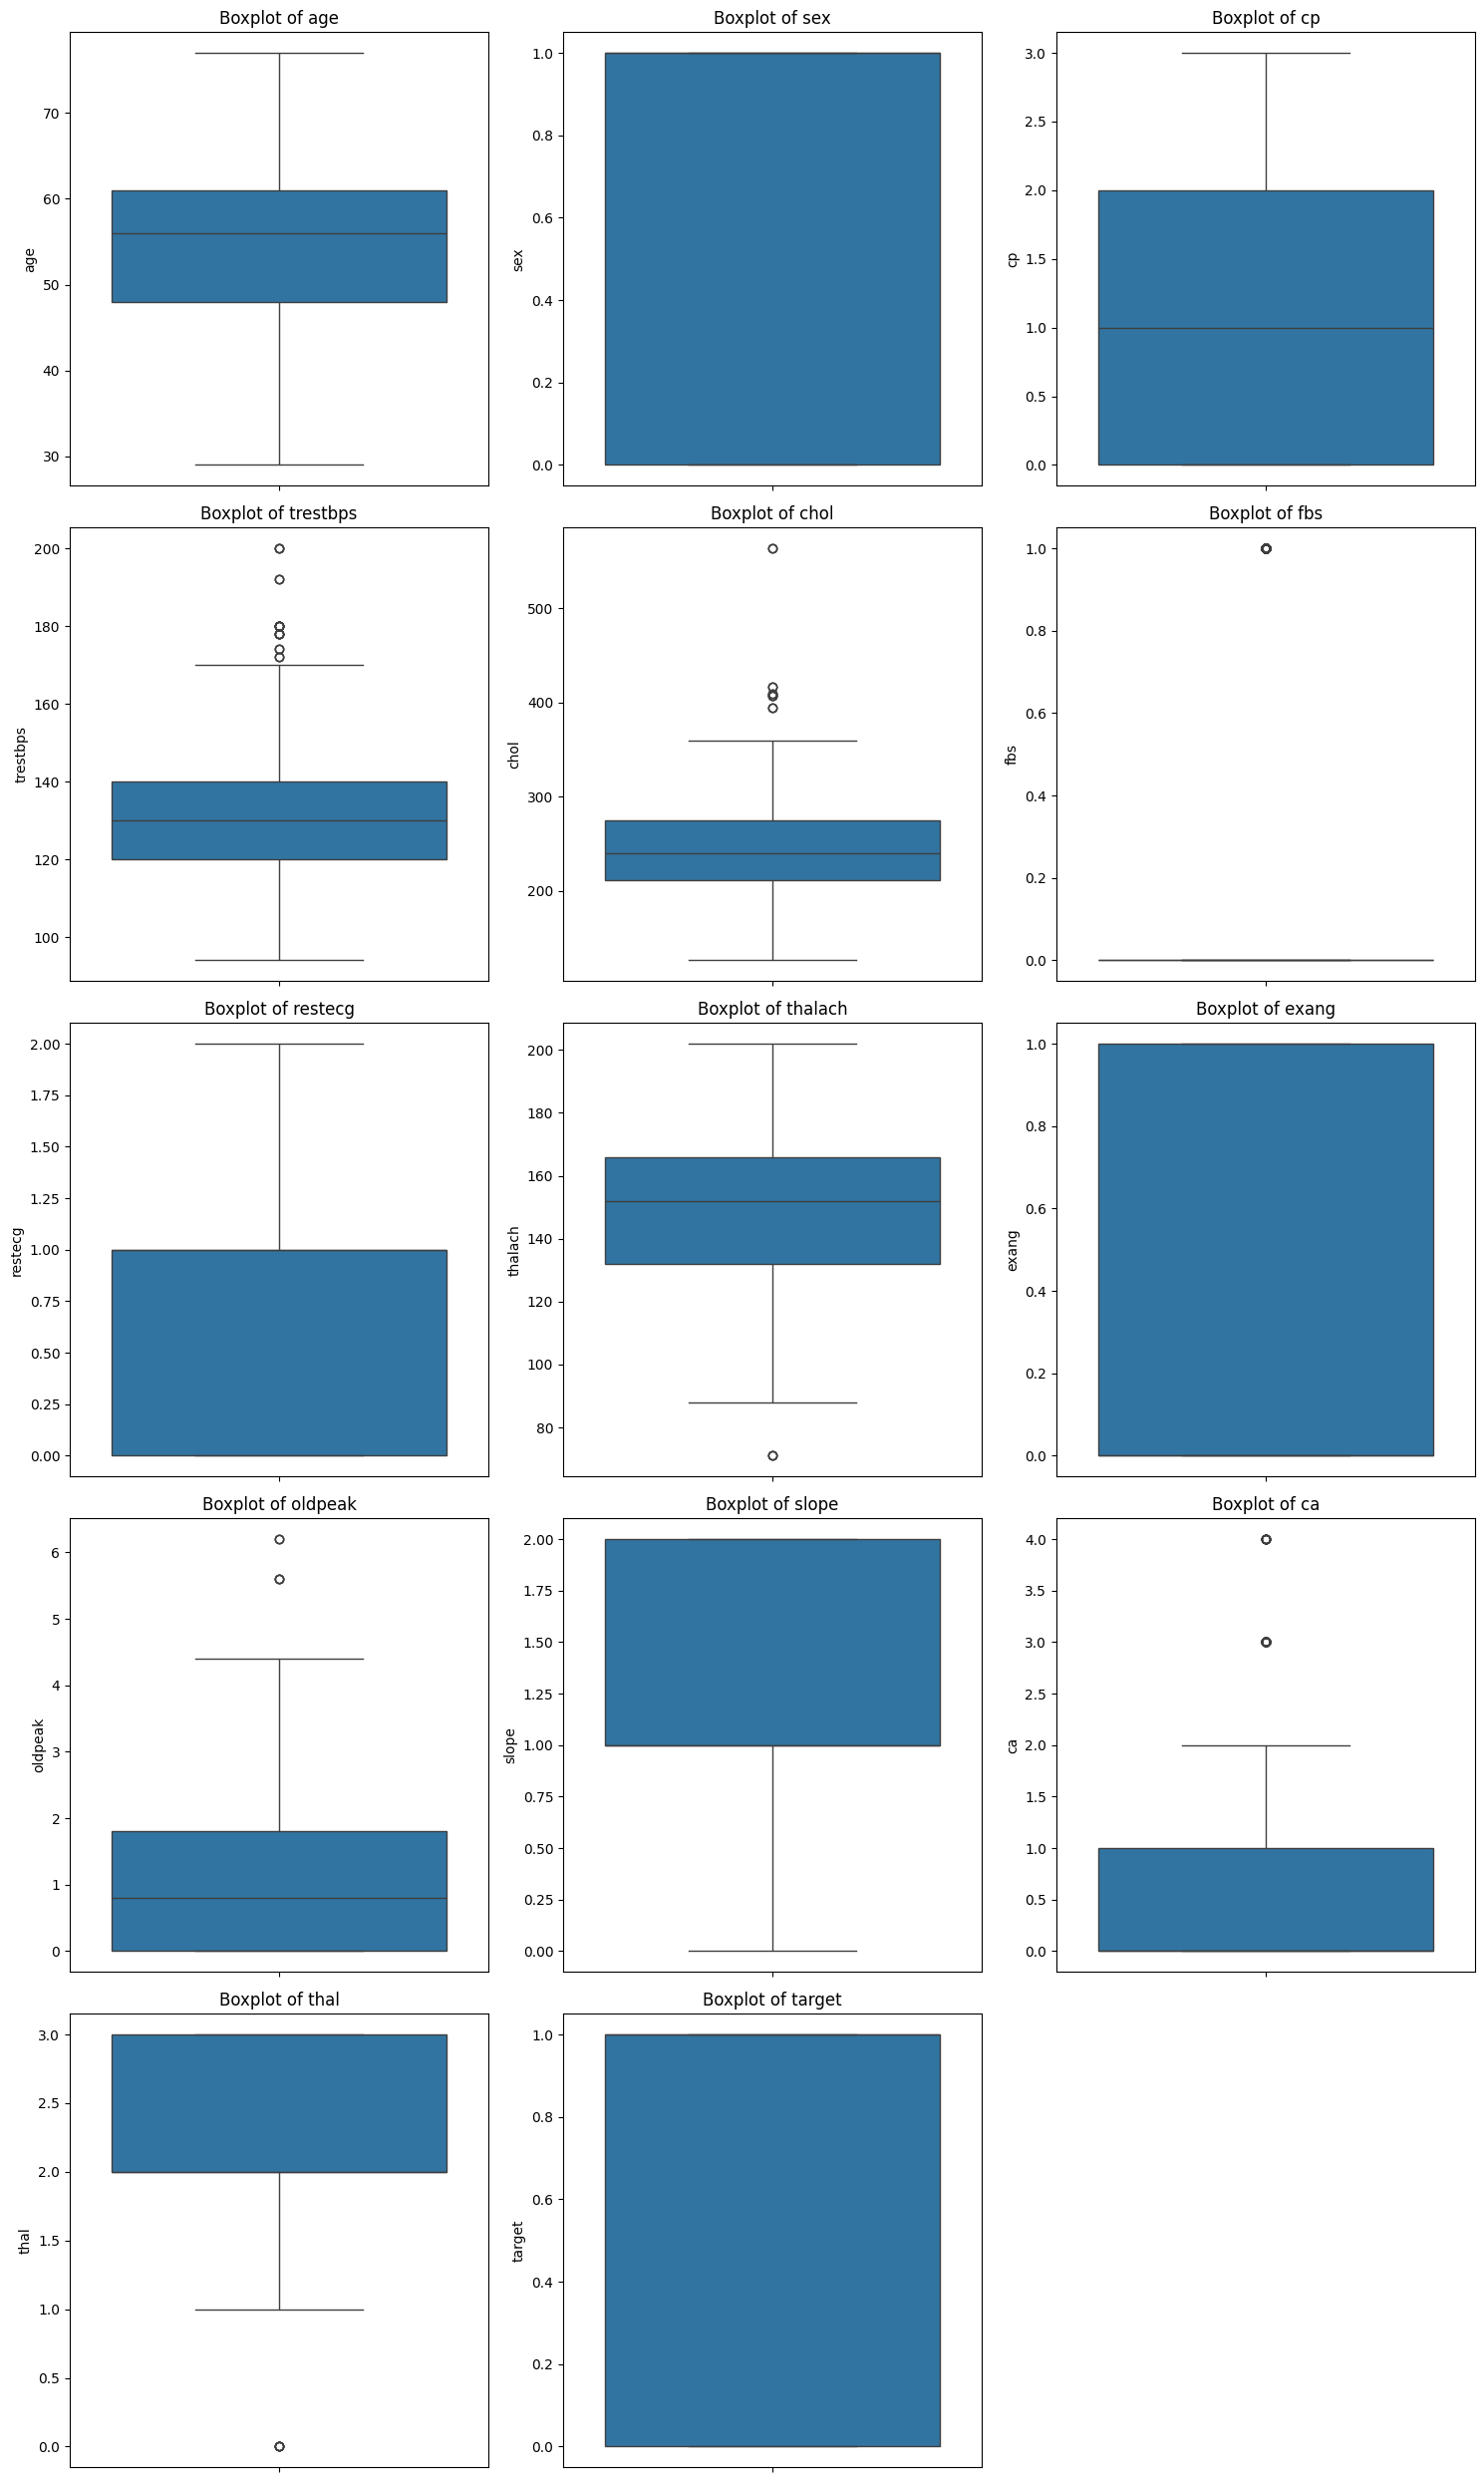

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numeric columns (adjust if you have a specific list)
numeric_cols = data.select_dtypes(include=['number']).columns

# Set up the figure and axes
n_cols = 3  # Number of columns for the subplots
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # Calculate necessary rows
plt.figure(figsize=(15, 5 * n_rows))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(numeric_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)

    # Create the boxplot
    sns.boxplot(y=data[col], ax=ax)

    ax.set_title(f'Boxplot of {col}', fontsize=12)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

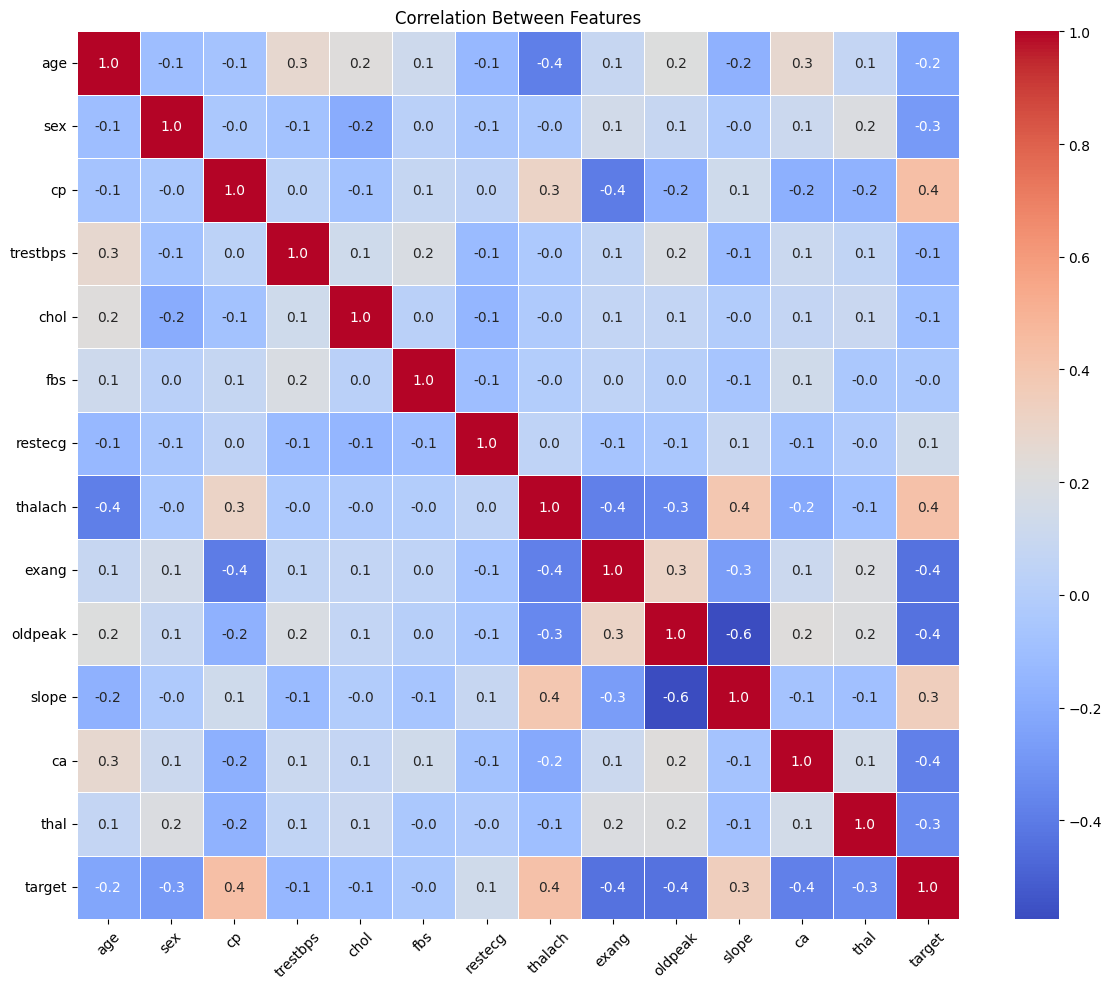


Top features related to heart disease:
cp         0.434854
thalach    0.422895
slope      0.345512
Name: target, dtype: float64


In [41]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])
corr = numeric_data.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, 
           annot=True, 
           fmt=".1f", 
           cmap='coolwarm',
           linewidths=0.5)
plt.title('Correlation Between Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Show top features for heart disease
print("\nTop features related to heart disease:")
print(corr['target'].sort_values(ascending=False)[1:4])

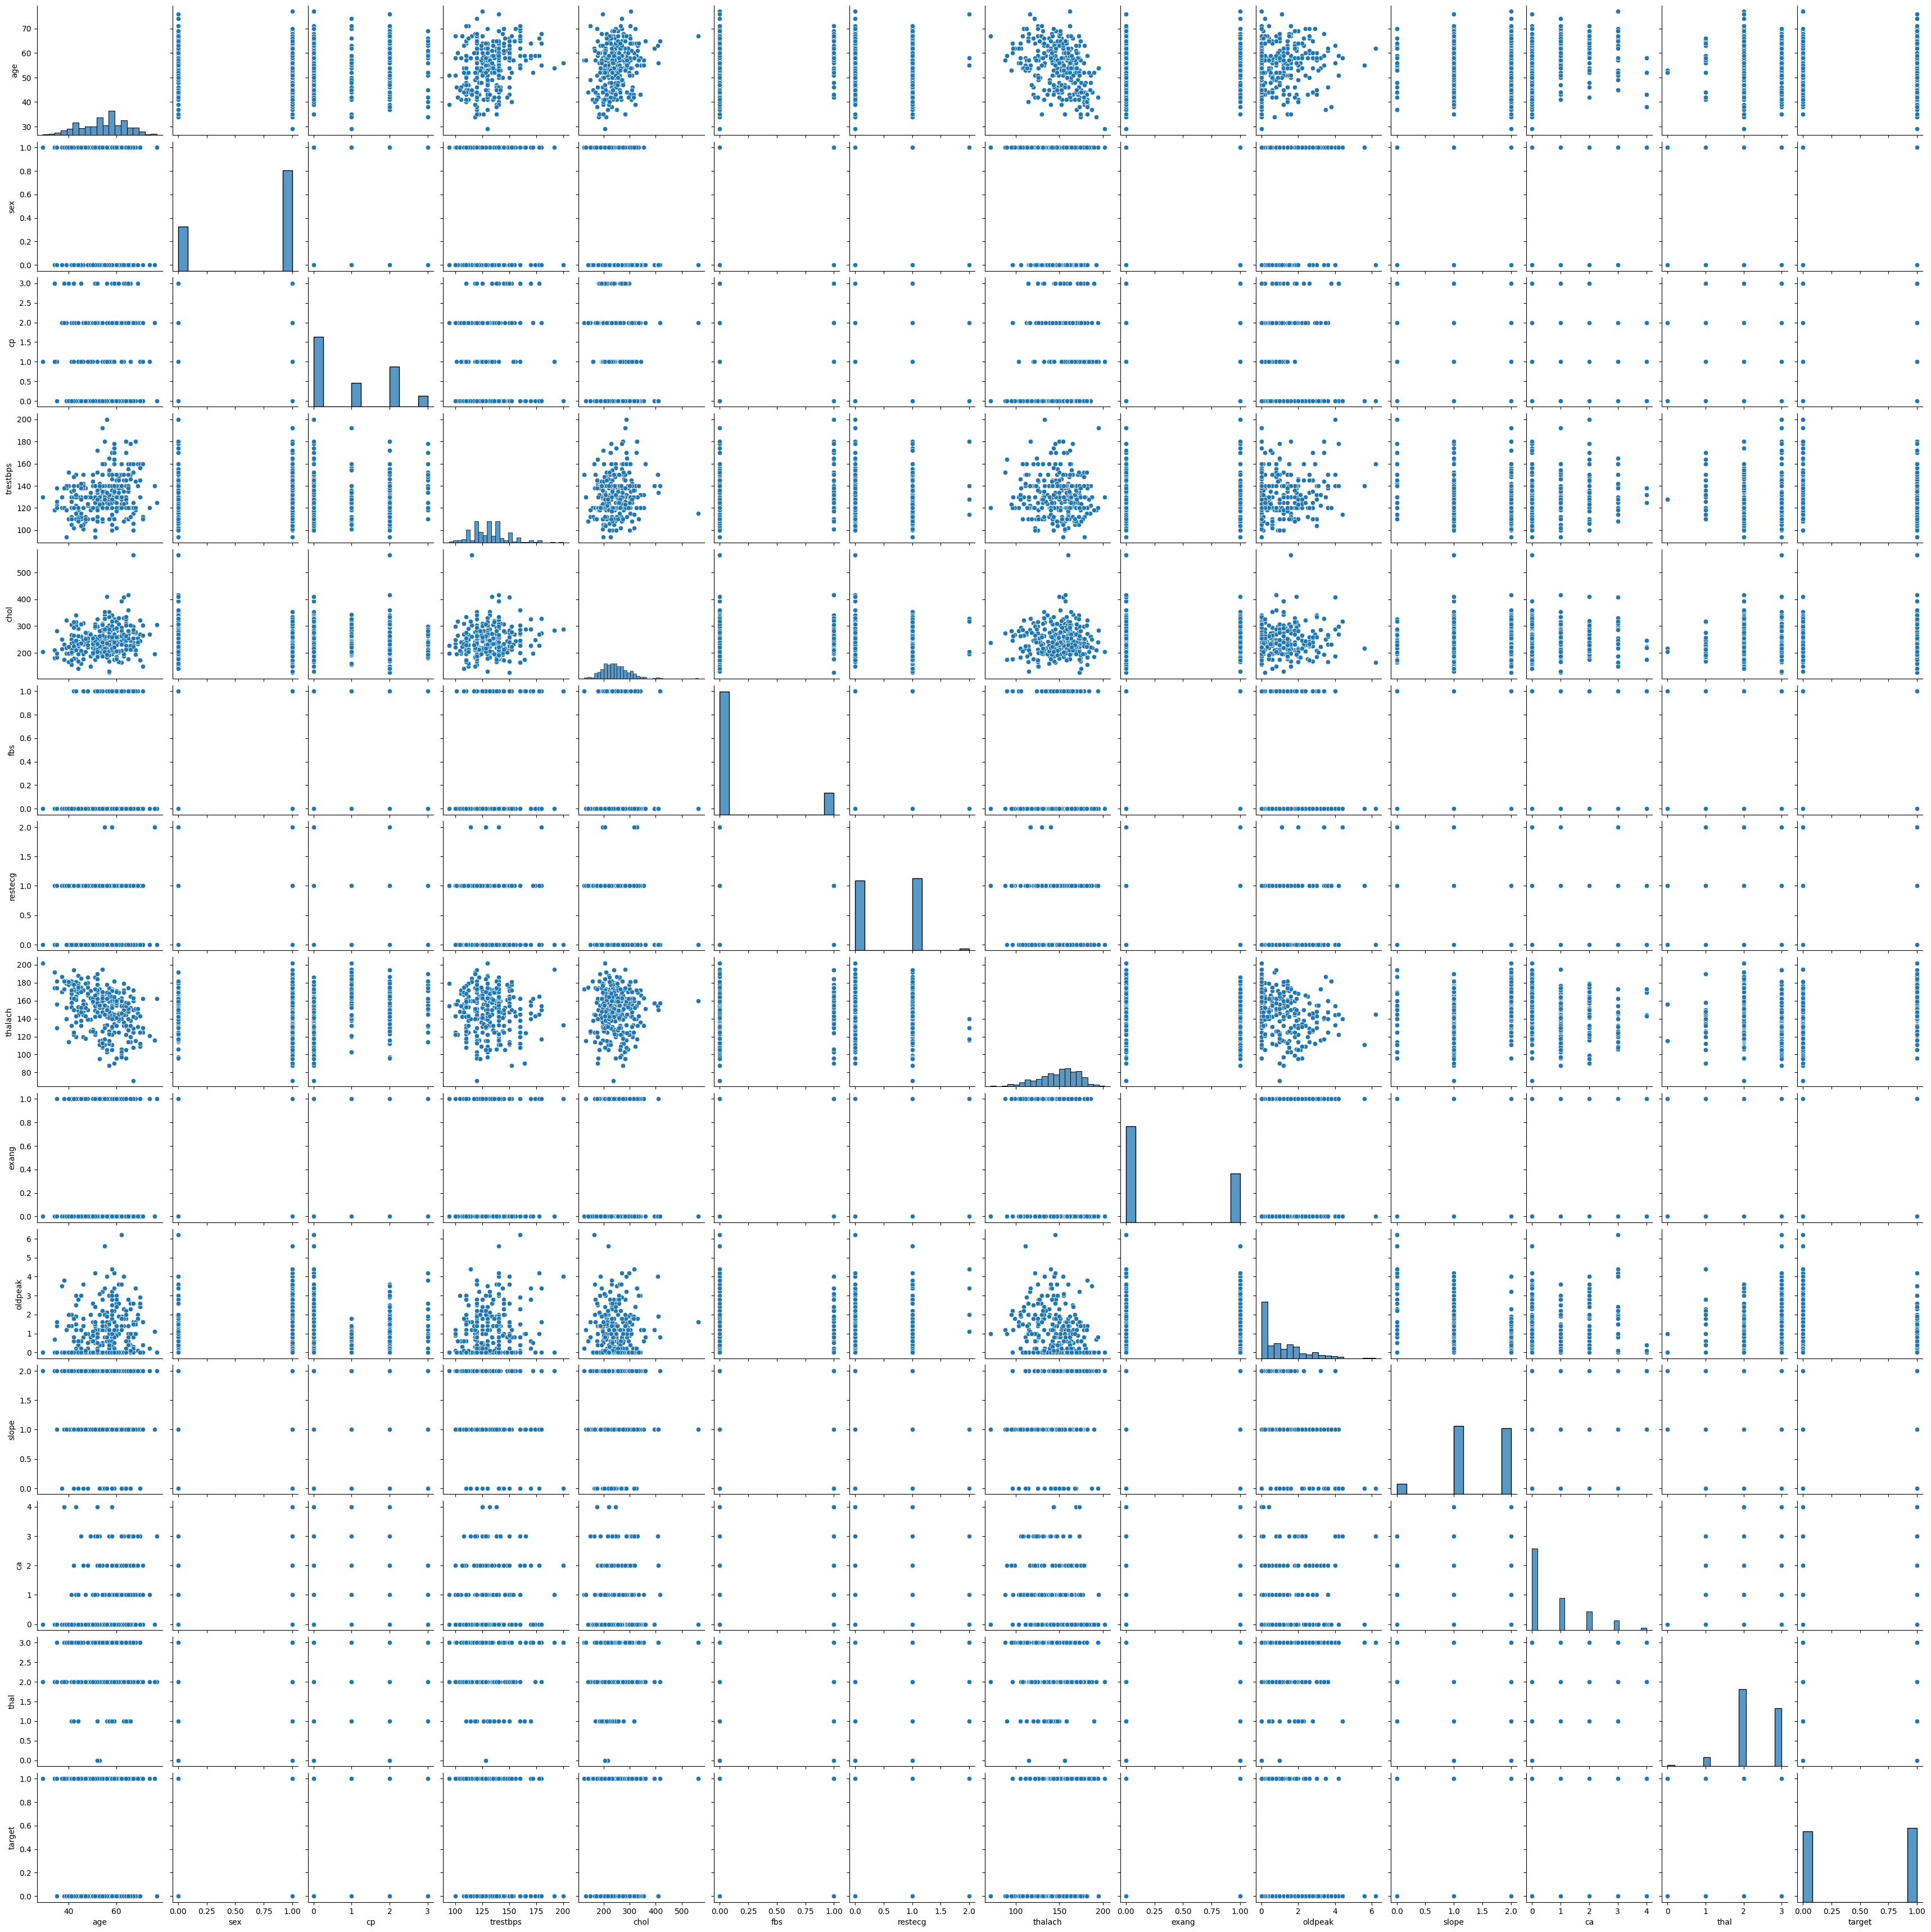

In [39]:
sns.pairplot(data[numeric_cols])
plt.show()
